# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

**Esta notebook lo puedes encontrar en el siguiente repositorio [aquí](https://github.com/Steven030530/proyecto3).**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px


In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset1 = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset1.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset1.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [11]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset1['fecha2'] = pd.to_datetime(dataset1.fecha) + pd.to_timedelta(dataset1.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset1.drop(columns=['fecha','hora_fin'], inplace = True)

dataset1.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [12]:
#Corregimos el nombre de fecha2 a fecha
dataset1.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset1.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [13]:
#Reordenamos el dataset por fecha
dataset1.sort_values('fecha', inplace = True)
dataset1.reset_index(drop=True, inplace = True)
dataset1.drop(columns=["dia","sentido"],inplace=True)
dataset1

tipo_vehiculo  cantidad_pasos               fecha
0             Pesado               1 2017-01-01 00:00:00
1            Liviano               9 2017-01-01 00:00:00
2            Liviano             644 2017-01-01 00:00:00
3             Pesado               6 2017-01-01 00:00:00
4             Pesado               1 2017-01-01 00:00:00
...              ...             ...                 ...
238864       Liviano             556 2019-12-31 22:00:00
238865        Pesado               1 2019-12-31 22:00:00
238866       Liviano             580 2019-12-31 22:00:00
238867       Liviano             214 2019-12-31 23:00:00
238868       Liviano             190 2019-12-31 23:00:00

[238869 rows x 3 columns]

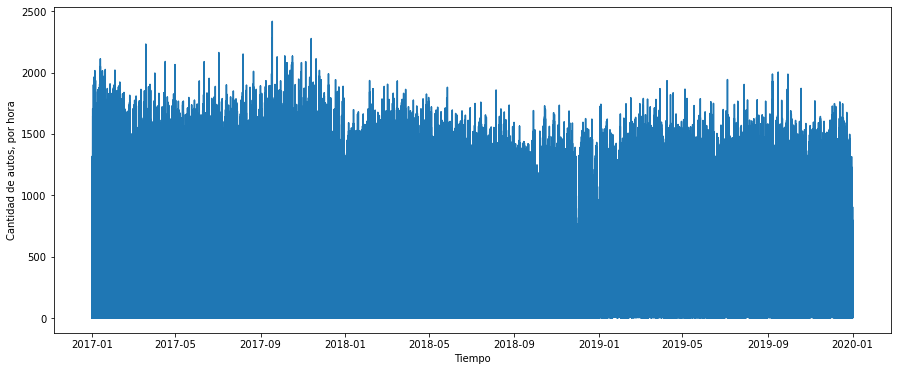

In [14]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset1.fecha, dataset1.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [15]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset1.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

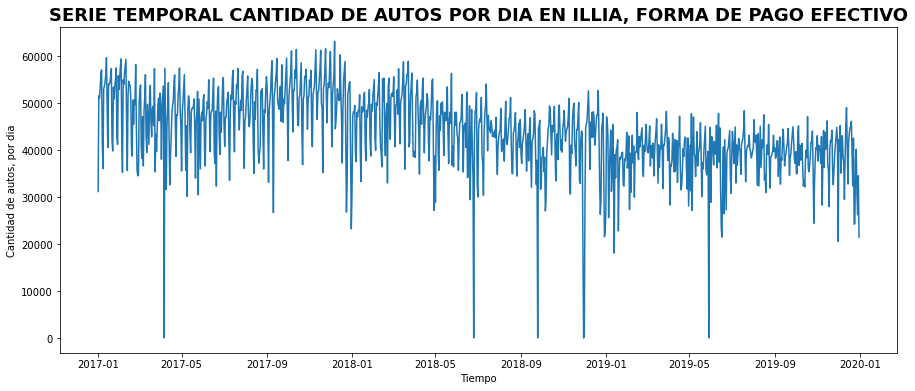

In [16]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.title("SERIE TEMPORAL CANTIDAD DE AUTOS POR DIA EN ILLIA, FORMA DE PAGO EFECTIVO",size=18,fontweight="bold")
plt.show()

## OUTLIERS

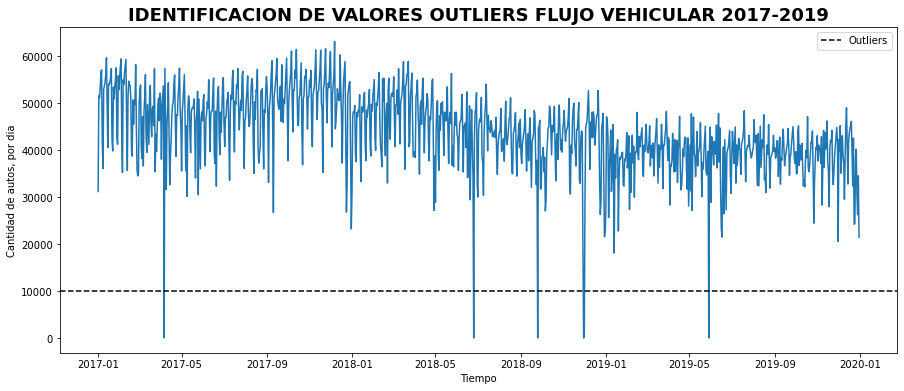

In [17]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.axhline(y=10000,color="k",linestyle="--",label="Outliers")
plt.title("IDENTIFICACION DE VALORES OUTLIERS FLUJO VEHICULAR 2017-2019",size=18,fontweight="bold")
plt.legend()
plt.show()

En el grafico anterior podemos observar como la linea intercalada de color negro nos señala los valores outliers los cuales debemos tratar para poder continuar con nuestro proceso de analisis de serie temporal, podemos volver esos valores atipicos en valores nulos y ademas utilizar la funcion de pandas interpolate que nos asignara un valor acorde a lo que se viene dando en la serie temporal.

## INTERPOLATE

In [18]:
# con este proceso los valores inferiores a 10.000 se convierten en valores faltantes
diario.cantidad_pasos[diario.cantidad_pasos<10000]= np.nan

In [19]:
# con la funcion interpolate los valores faltantes asumen un valor consecuente dentro de la serie temporal
diario= diario.interpolate() 

In [20]:
#verificamos que no nos queden valores faltantes
diario.isna().sum()

cantidad_pasos    0
dtype: int64

### ANALISIS DE ESTACIONARIEDAD

Con este analisis determinaremos si la serie temporal es estacionaria o no, ya que con la funcion de statsmodels podemos importar la funcion adfuller donde nos indicara el valor estadistico y el P valor, los cuales podremos comparar con los valores criticos y determinar si podemos rechazar o no la hipotesis nula. 

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
result = adfuller(diario["cantidad_pasos"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -17.756099
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


Con el analisis anterior podemos identificar que nuestro P valor es alto lo que para este caso no se rechaza la hipotesis nula y se llega a la conclusion de que la serie temporal no es una serie estacionaria.

## SUAVIZADO

Las tecnicas de suavizado nos permiten reducir la variacion de una serie temporal, en este paso analizaremos varias tecnicas de suavizado y como se ajustan  a los datos reales 

In [23]:
# utilizamos desde la libreria statsmodels una tecnica de suavizado que nos
# permita mejorar la visualizacion de los datos y nos elimine esa volatilidad en los datos

# Suavizado Promedio movil simple

diario["PMS"]= diario["cantidad_pasos"].rolling(window=7).mean()

# Suavisado Promedio Movil Exponencial

diario["SPME"]= diario["cantidad_pasos"].ewm(span=7,adjust=False).mean()


# Suavisado con Holt-winters

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Suavisado Exponencial Triple Addictivo

diario["SETadd"]= ExponentialSmoothing(diario["cantidad_pasos"],trend="add",seasonal="add",
                                      seasonal_periods=7).fit().fittedvalues



C:\Users\Asus\miniconda3\envs\redes\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [24]:
diario.head()

cantidad_pasos  PMS          SPME        SETadd
fecha                                                      
2017-01-01         31183.0  NaN  31183.000000  31583.040816
2017-01-02         51568.0  NaN  36279.250000  52308.724463
2017-01-03         51093.0  NaN  39982.687500  52123.078462
2017-01-04         53332.0  NaN  43320.015625  54607.054927
2017-01-05         56486.0  NaN  46611.511719  57967.674486

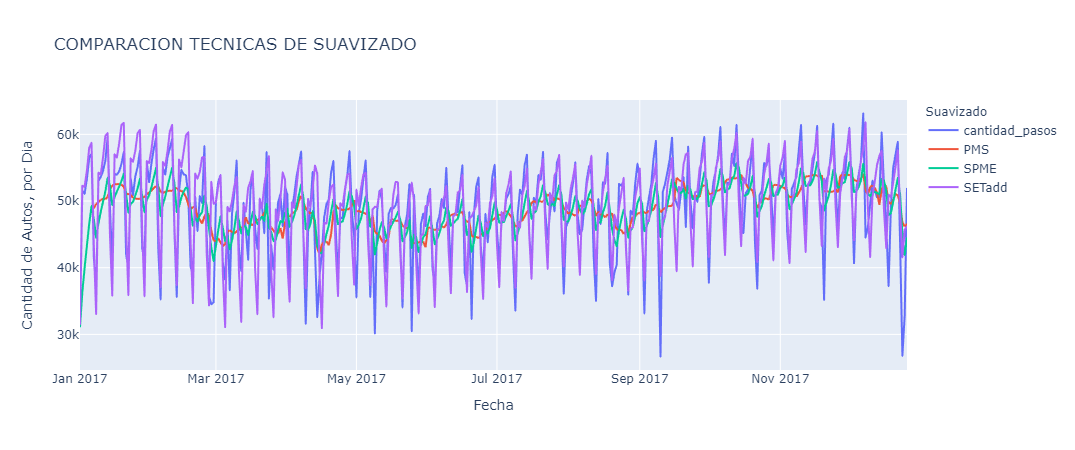

In [25]:
import plotly.express as px
import plotly.graph_objects as go
px.line(data_frame=diario[:360],labels={"value":"Cantidad de Autos, por Dia","variable":"Suavizado",
                                       "fecha":"Fecha"},
        title="COMPARACION TECNICAS DE SUAVIZADO")
# Analizamos el primer año con el objetivo de identificar las diferencias entre las tecnicas


El grafico anterior podemos analizar como se presentan las diferentes tecnicas suavizado vs el los datos reales y lo que nos muestra es que tecnicas basicas como el PMS(Promedio Movil Simple) logramos perder informacion dentro de la primera ventana para este caso 7 dias, en las demas tecnicas podemos observar como los datos se van ajustando mejor a los datos originales como la tecnica SETadd(Suavizado Exponencial Triple Adictivo), sin embargo se puede observar como en ciertas partes logra sobreestimar y subestimar el valor real.


El grafico es interactivo y podemos seleccionar los suavizados que queramos comparar o seleccionar una parte especifica de la serie temporal

### OTRO MEDIO DE PAGO

En este punto abordaremos el mismo peaje pero atraves de otro medio de pago diferente al efectivo, nos ayudara a visualizar si la tendencia del flujo vehicular realmente esta disminuyendo o si solo los usuarios estan cambiando la forma de pago a la hora de cruzar por estos peajes.

In [26]:
telepase= (dataset["forma_pago"]=="TELEPASE") & (dataset["estacion"]=="Illia")

In [27]:
data2=dataset[telepase]
data2["fecha2"]= pd.to_datetime(data2.fecha)+pd.to_timedelta(data2.hora_fin,unit="h")
data2.drop(columns=["fecha","hora_fin","estacion","forma_pago","periodo","hora_inicio"],inplace=True)
data2.rename(columns = {'fecha2':'fecha'}, inplace = True) 
data2.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
20  Martes     Centro       Liviano              59 2019-01-01 01:00:00
21  Martes     Centro        Pesado               1 2019-01-01 01:00:00
23  Martes  Provincia       Liviano             106 2019-01-01 01:00:00
25  Martes  Provincia        Pesado               2 2019-01-01 01:00:00
85  Martes     Centro       Liviano             507 2019-01-01 02:00:00

In [28]:
data2.sort_values('fecha', inplace = True)
data2.reset_index(drop=True, inplace = True)
data2

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo     Centro        Pesado               9 2017-01-01 00:00:00
1       Domingo  Provincia        Pesado               3 2017-01-01 00:00:00
2       Domingo  Provincia        Pesado               7 2017-01-01 00:00:00
3       Domingo  Provincia       Liviano             275 2017-01-01 00:00:00
4       Domingo     Centro       Liviano             459 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
204607   Martes  Provincia       Liviano             600 2019-12-31 22:00:00
204608   Martes     Centro       Liviano             630 2019-12-31 22:00:00
204609   Martes  Provincia       Liviano             110 2019-12-31 23:00:00
204610   Martes     Centro       Liviano             122 2019-12-31 23:00:00
204611   Martes  Provincia        Pesado               1 2019-12-31 23:00:00

[204612 rows x 5 columns]

In [29]:
teledia = data2.resample('D', on = 'fecha').sum()
print(teledia.shape)
teledia.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           12326
2017-01-02           35621
2017-01-03           39390
2017-01-04           40294
2017-01-05           41373

In [30]:
# outliers en la serie realizamos la misma funcion de interpolar
teledia.cantidad_pasos[teledia.cantidad_pasos<10000]= np.nan
teledia= teledia.interpolate() 

In [31]:
# Creamos un dataset donde se puede visualizar 
#tanto la forma de pago en efectivo como la forma de pago Telepase

teledia["Efectivo"]= diario.cantidad_pasos

In [32]:
teledia.columns=["Telepase","Efectivo"]

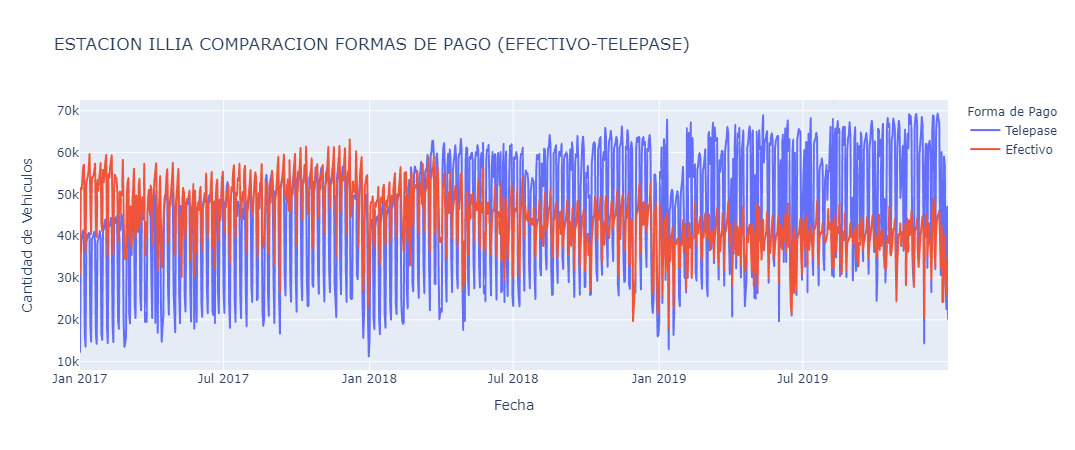

In [33]:
px.line(teledia,title="ESTACION ILLIA COMPARACION FORMAS DE PAGO (EFECTIVO-TELEPASE)",
        labels={"value":"Cantidad de Vehiculos","fecha":"Fecha","variable":"Forma de Pago"})

En el grafico anterior podemos observar como la tendencia de la forma de pago en efectivo va decreciendo atraves del tiempo, por el contrario la forma de pago telepase va aumentando a medida que pasa el tiempo, lo que nos indica que no esta disminuyendo el flujo vehicular sino que los usuarios estan migrando hacia otra forma de pago.

### OTROS ANALISIS

El siguiente analisis consiste en identificar que tipo de vehiculos transita mas por el peaje Illia bajo la forma de pago en Efectivo y Telepase.

In [34]:
# Utilizamos la funcion get_dummies de la libreria pandas con el fin de transformar las variables
# categoricas en numericas
vehi_efec= pd.get_dummies(dataset1.tipo_vehiculo,prefix="Vehiculo")

In [35]:
# unimos las variables dummies con el dataset para que todos nos quede en un solo lugar
vehi_efec= vehi_efec.join(dataset1,how="right")

In [36]:
#Creamos la columna de cantidad de vehiculos, esto nos ayudara a identificar cuantos
# vehiculos de tipo de liviano y cuantos Vehiculo de tipo pesado transita por el peaje
vehi_efec["Cantidad_Vehiculo_Liviano"]=vehi_efec.Vehiculo_Liviano*vehi_efec.cantidad_pasos
vehi_efec["Cantidad_Vehiculo_Pesado"]=vehi_efec.Vehiculo_Pesado*vehi_efec.cantidad_pasos
vehi_efec.drop(columns=["Vehiculo_Liviano","Vehiculo_Pesado"],inplace=True)

* Repetimos el mismo proceso para la forma de pago por Telepase

In [37]:
vehi_tele= pd.get_dummies(data2.tipo_vehiculo,prefix="Vehiculo")
vehi_tele= vehi_tele.join(data2)
vehi_tele["Cantidad_Vehiculo_Liviano"]=vehi_tele.Vehiculo_Liviano*vehi_tele.cantidad_pasos
vehi_tele["Cantidad_Vehiculo_Pesado"]=vehi_tele.Vehiculo_Pesado*vehi_tele.cantidad_pasos
vehi_tele.drop(columns=["Vehiculo_Liviano","Vehiculo_Pesado"],inplace=True)

In [38]:
# reemsampleamos los dataset
diario_efec= vehi_efec.resample("D",on="fecha").sum()
diario_tel= vehi_tele.resample("D",on="fecha").sum()

In [39]:
diario_efec.drop(columns=["cantidad_pasos"],inplace=True)
diario_tel.drop(columns=["cantidad_pasos"],inplace=True)

In [40]:
# Outliers 
diario_efec.Cantidad_Vehiculo_Liviano[diario_efec.Cantidad_Vehiculo_Liviano<10000]=np.nan
diario_efec.Cantidad_Vehiculo_Pesado[diario_efec.Cantidad_Vehiculo_Pesado<100]=np.nan

diario_tel.Cantidad_Vehiculo_Liviano[diario_tel.Cantidad_Vehiculo_Liviano<10000]=np.nan
diario_tel.Cantidad_Vehiculo_Pesado[diario_tel.Cantidad_Vehiculo_Pesado<100]=np.nan
#Interpolar

diario_efec=diario_efec.interpolate()
diario_tel=diario_tel.interpolate()

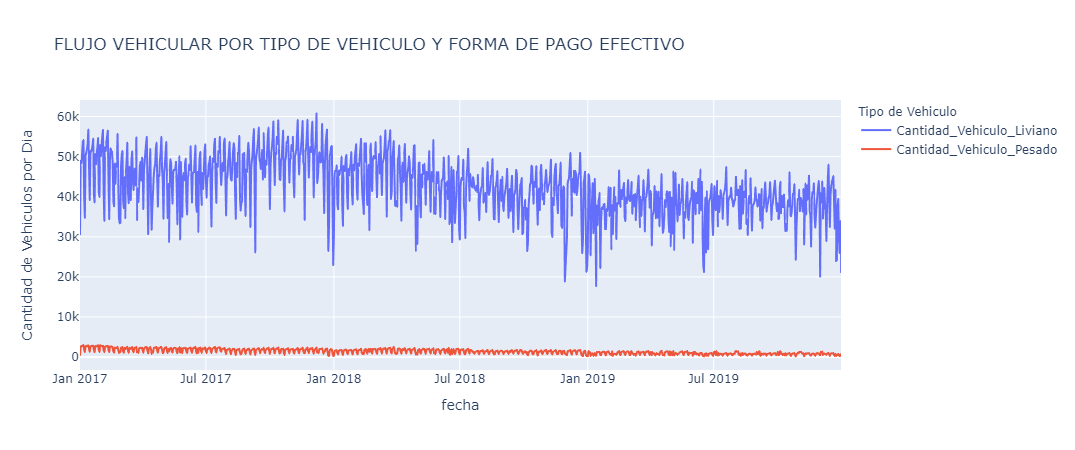

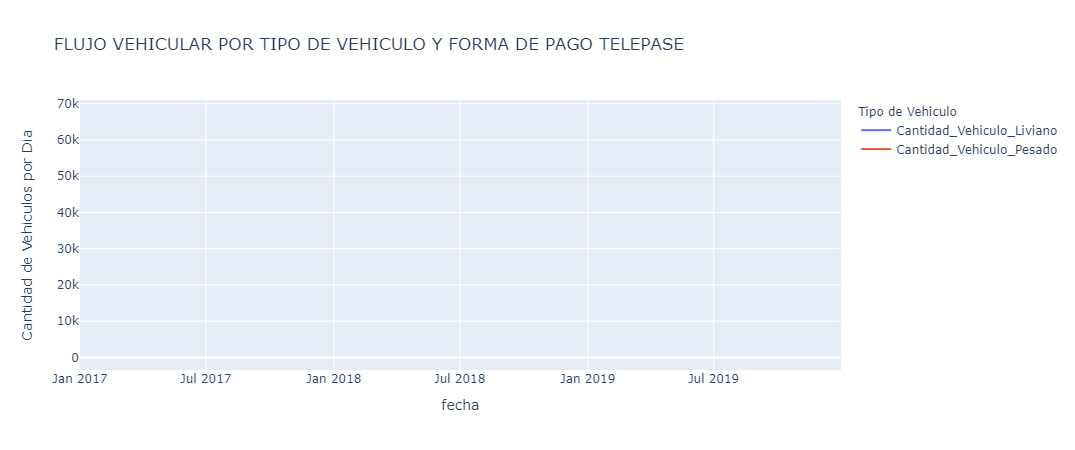

In [41]:
fig1=px.line(diario_efec,title="FLUJO VEHICULAR POR TIPO DE VEHICULO Y FORMA DE PAGO EFECTIVO",
             labels={"variable":"Tipo de Vehiculo","value":"Cantidad de Vehiculos por Dia"})
fig2=px.line(diario_tel,title="FLUJO VEHICULAR POR TIPO DE VEHICULO Y FORMA DE PAGO TELEPASE",
             labels={"variable":"Tipo de Vehiculo","value":"Cantidad de Vehiculos por Dia"})

fig1.show()
fig2.show()

En los dos graficos anteriores podemos observar como la influencia en el trafico del peaje Illia la mayoria  de vehiculos son del tipo livianos que siguen las mismas tendencias de la serie temporal original donde la forma de pago en efectivo tiene una tendencia decreciente y la forma de pago en telepase tiene una tendencia incremental, pero analizando el tipo de vehiculo pesado podemos darnos cuenta que en la forma de pago efectivo tiene un clara tendencia a la baja pero por el contrario en la forma de telepase no se evidencia una tendencia clara y pareciera que se mantuviera en el tiempo, una posible deduccion podria ser que este tipo de vehiculo pesado si esta disminuyendo su flujo vehicular por dicho peaje.

### DESCOMPOSICION DE LA SERIE TEMPORAL

In [42]:
# Utilizamos la libreria de statsmodels seasonal decompose para crear un grafico donde
# podemos observar la tendencia, estacionalidad y el ruido de la serie que estamos analizando
from statsmodels.tsa.seasonal import seasonal_decompose

decompose= seasonal_decompose(diario["cantidad_pasos"])


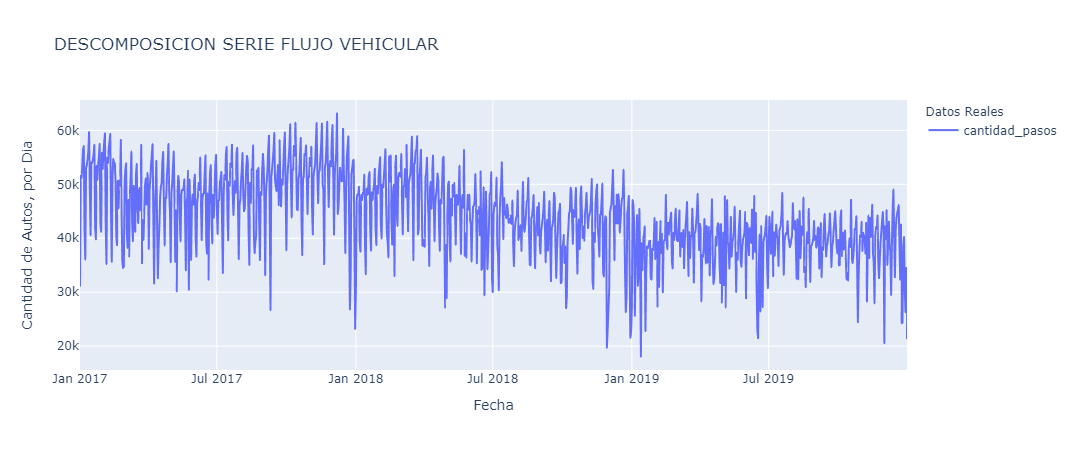

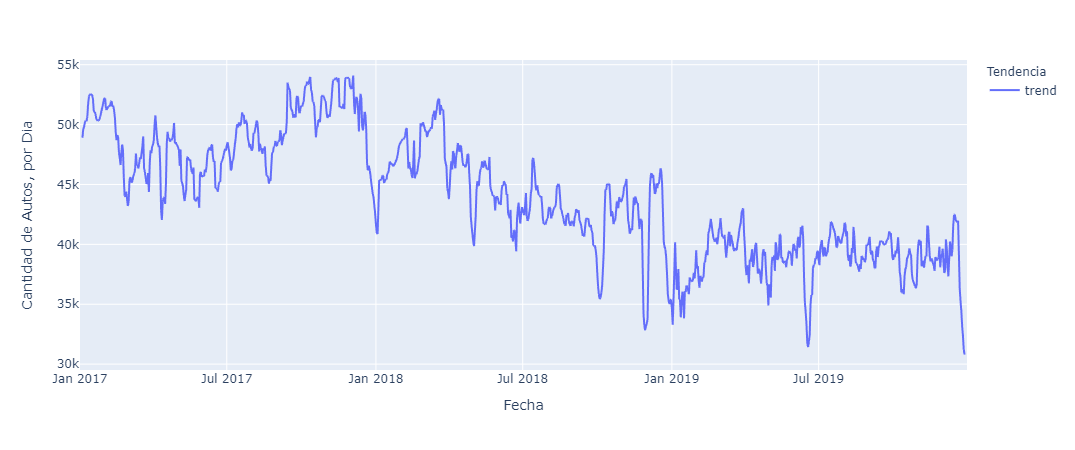

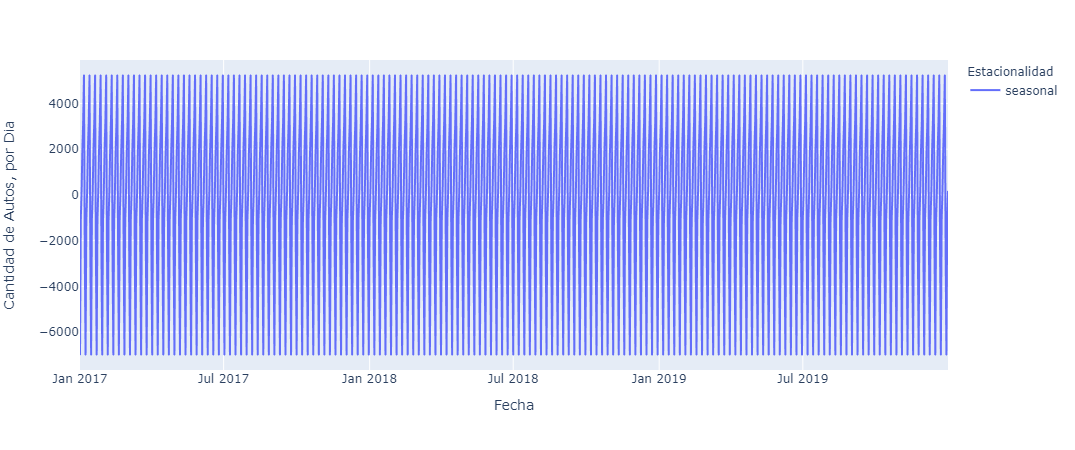

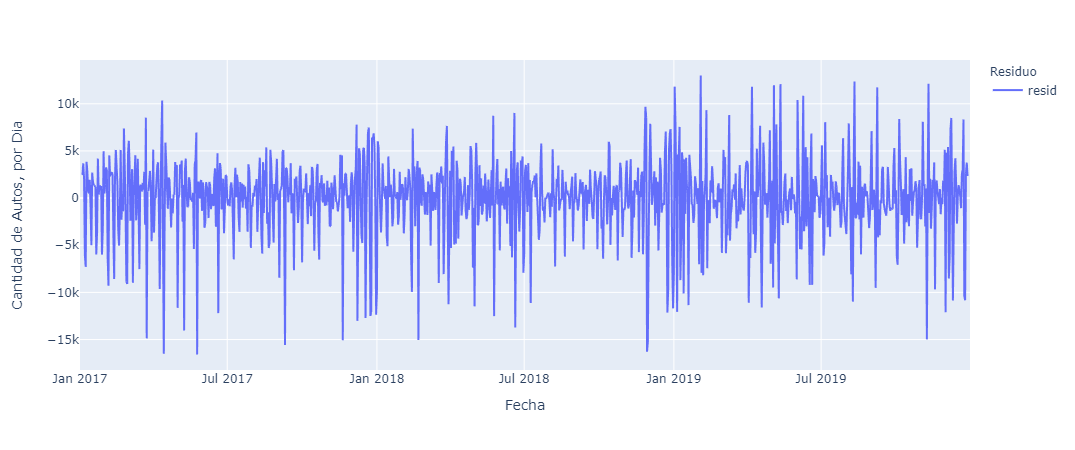

In [43]:
fig1=px.line(data_frame=decompose.observed,title="DESCOMPOSICION SERIE FLUJO VEHICULAR ",
             labels={"value":"Cantidad de Autos, por Dia","fecha":"Fecha","variable":"Datos Reales"})
fig2=px.line(data_frame=decompose.trend,labels={"value":"Cantidad de Autos, por Dia","fecha":"Fecha","variable":"Tendencia"})
fig3=px.line(data_frame=decompose.seasonal,labels={"value":"Cantidad de Autos, por Dia","fecha":"Fecha","variable":"Estacionalidad"})
fig4=px.line(data_frame=decompose.resid,labels={"value":"Cantidad de Autos, por Dia","fecha":"Fecha","variable":"Residuo"})
fig1.show()
fig2.show()
fig3.show()
fig4.show()

En los graficos anteriores podemos observar la descomposcion de la serie temporal, por ejemplo en el grafico No 1 podemos observar los datos completos de la serie de tiempo, en el segundo grafico obtenemos la tendencia del flujo vehicular para estos periodos de tiempo donde se evidencia una clara tendencia negativa o a la baja, para el tercer grafico podemos observar que existe una estacionalidad dentro de nuestro dataset y por ultimo podemos ver los residuos de nuestra serie temporal que se asemeja a ruido blanco.

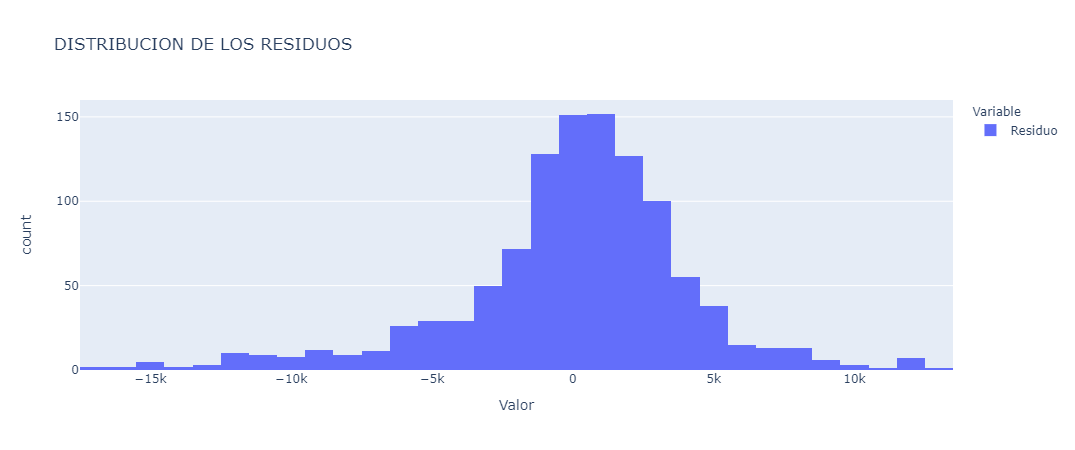

In [44]:
px.histogram(data_frame=decompose.resid.rename("Residuo"),labels={"value":"Valor","variable":"Variable"},
             title="DISTRIBUCION DE LOS RESIDUOS",width=10)

De acuerdo con el grafico anterior podemos observar que los residuos siguen una distribuccion normal alrededor 0.

### ANALISIS DE AUTOCORRELACION

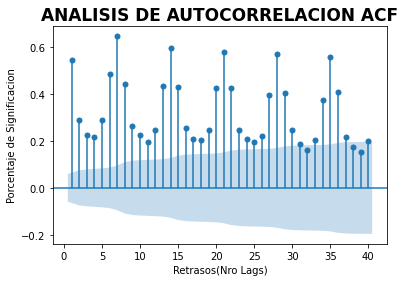

In [45]:
# para analizar la autocorrelacion importamos desde statsmodels la funcion plt_acf

import statsmodels.graphics.tsaplots as sts

sts.plot_acf(diario["cantidad_pasos"],zero=False,lags=40)
plt.title("ANALISIS DE AUTOCORRELACION ACF",size=17,fontweight="bold")
plt.xlabel("Retrasos(Nro Lags)")
plt.ylabel("Porcentaje de Significacion")
plt.show()

En el grafico anterior podemos analizar los primeros 40 Retrasos de la serie temporal, donde podemos analizar que existe un patron estacional, el grafico nos muestra la correlacion que existe de la serie temporal consigo misma en fechas pasadas, el area azul que podemos observar en el eje x mide si son  significativamente distintos de cero, lo que nos indica que si los coeficientes estan dentro del area azul podemos decir que equivalen a cero.

Tambien podemos ver como la franja azul se va expandiendo esto significa que a mayor distancia en el tiempo es mas improbable que la autocorrelacion exista.

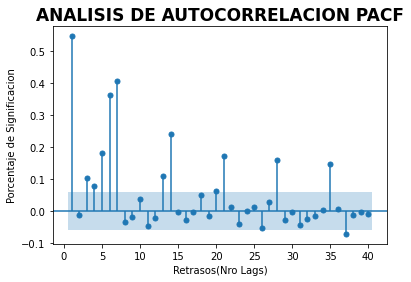

In [46]:
sts.plot_pacf(diario["cantidad_pasos"],zero=False,lags=40,)
plt.title("ANALISIS DE AUTOCORRELACION PACF",size=17,fontweight="bold")
plt.xlabel("Retrasos(Nro Lags)")
plt.ylabel("Porcentaje de Significacion")
plt.show()

En el grafico anterior podemos observar que coeficientes son significativos pero a diferencia de la Funcion de Autocorrelacion la funcion de autocorrelacion parcial mide la correlacion entre 2 variables en un determinado periodo sin tener en cuenta los retrasos intermedios entre ambas.

Podemos observar como el primer coeficiente es altamente significativo y va disminuyendo atraves del tiempo, lo que nos indica que a pesar de la alta significacion de ese coeficiente a mayor numero de retrasos va perdiendo significacion para la serie temporal.

### TRAIN Y TEST SPLIT

Es hora de separar la serie temporal en datos de entrenamiento y datos de prueba para realizar los modelos predictivos.

In [47]:
df = diario["cantidad_pasos"]
df.shape

(1095,)

In [48]:
look_back = 30
look_back

30

In [49]:
N = df.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(1064, 30) (1064,)


In [50]:
for i in range(X.shape[0]):
    X[i,:] = df.iloc[i:i+look_back]
    y[i] = df.iloc[i+look_back]

In [51]:
N_train =int(len(df)*0.8)-look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = int(len(df)*0.2) #cantidad de puntos que vamos a usar para evaluar
N_total= N_train+ N_test
length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(846, 30) (846,)
(218, 30) (218,)


In [52]:
length_total

1095

# TECNICA ONE_STEP PREDICTION

### MODELO BENCHMARK - REGRESION LINEAL

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [54]:
benchmark= LinearRegression()

In [55]:
benchmark.fit(X_train,y_train)

LinearRegression()

In [56]:
y_train_pred_bench = benchmark.predict(X_train)
y_test_pred_bench = benchmark.predict(X_test)

RMSE Train: 4861.65
RMSE: 4894.9


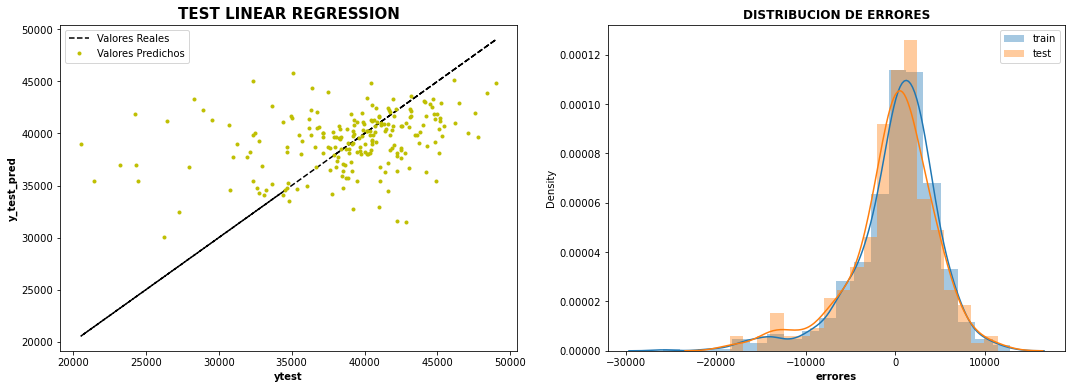

In [57]:
# graficamos el modelo con el fin de obtener informacion sobre el comportamiento del modelo
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)

#realizamos el grafico donde podemos observar la relacion 1 a 1
plt.plot(y_test,y_test,"k--", label="Valores Reales")
plt.plot(y_test, y_test_pred_bench, "y.", label="Valores Predichos")
plt.title("TEST LINEAR REGRESSION", fontsize=15, fontweight="bold")
plt.xlabel("ytest", fontweight="bold")
plt.ylabel("y_test_pred", fontweight="bold")
plt.legend()


plt.subplot(1,2,2)
sns.distplot(y_train - y_train_pred_bench, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_bench, bins = 20, label = 'test')
plt.xlabel('errores', fontweight="bold")
plt.title("DISTRIBUCION DE ERRORES",fontweight="bold")
plt.legend()

r_squared_train = np.round(r2_score(y_train, y_train_pred_bench),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred_bench)),2)
r_squared_test = np.round(r2_score(y_test, y_test_pred_bench),2)
rmse_test=np.round(np.sqrt(mean_squared_error(y_test, y_test_pred_bench)),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred_bench)),2)


print( "RMSE Train:",rmse_train)
print("RMSE:", rmse_test)

### MODELO RANDOM FOREST

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
# Creamos el modelo Random Forest 
rfr= RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)

# Entrenamos el modelo 
rfr.fit(X_train,y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

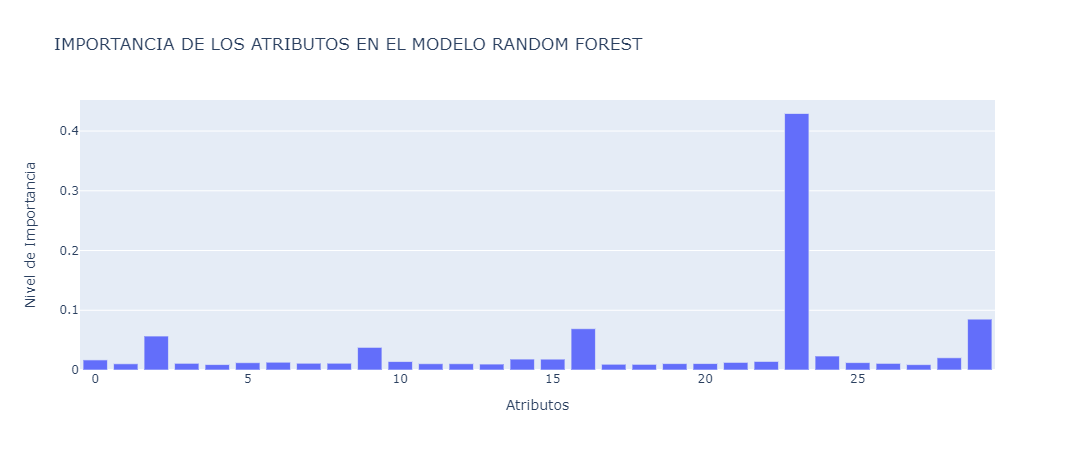

In [60]:
#Graficamos la Importacia de los Atributos para el modelo Random Forest
px.bar(x=np.arange(rfr.feature_importances_.size),y=rfr.feature_importances_,
       title="IMPORTANCIA DE LOS ATRIBUTOS EN EL MODELO RANDOM FOREST",
           labels={"y":"Nivel de Importancia","x":"Atributos"})


In [61]:
# predecimos los valores 
y_pred = rfr.predict(X)
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)

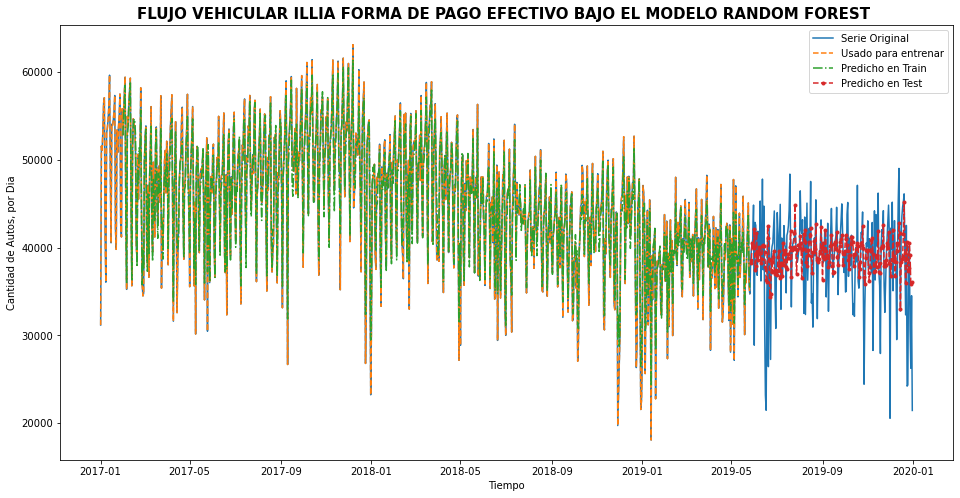

In [62]:
plt.figure(figsize=(16,8))
plt.plot(df.index[:length_total], df[:length_total], label = 'Serie Original')
plt.plot(df.index[:N_train + look_back], df[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(df.index[look_back:look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(df.index[N_train + look_back:length_total-1], y_test_pred,'--.', label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.title("FLUJO VEHICULAR ILLIA FORMA DE PAGO EFECTIVO BAJO EL MODELO RANDOM FOREST ",size=15, fontweight="bold")
plt.ylabel('Cantidad de Autos, por Dia')
plt.show()

El grafico anterior nos muestra como la prediccion en test del modelo random forest con valores por defecto no es una prediccion muy buena ya que los datos estan subestimando los valores reales y algunos pocos casos los datos estan siendo sobreestimados.

In [63]:
## Calculamos el Error

MSE_Train = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE_Train))

MSE_Test = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE_Test))

Error en Train: 1864.2548816542392
Error en Test: 4689.530485540004


RMSE Train: 1864.25
RMSE Test: 4689.53


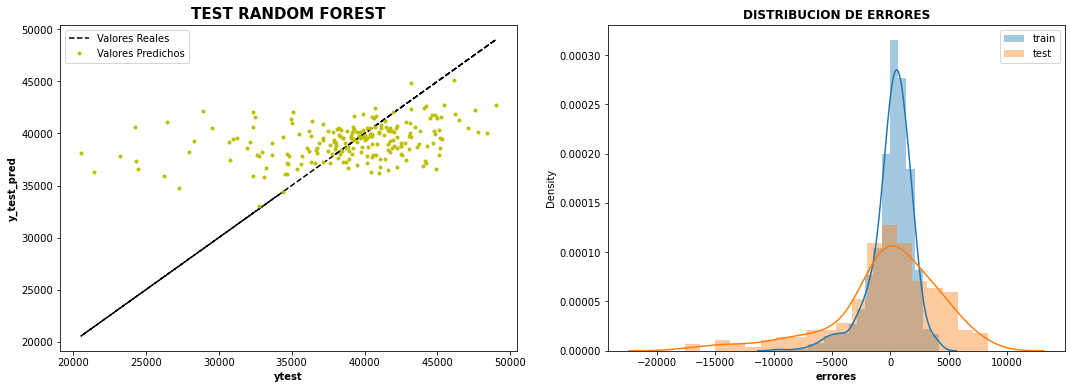

In [64]:
# graficamos el modelo con el fin de obtener informacion sobre el comportamiento del modelo
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)

#realizamos el grafico donde podemos observar la relacion 1 a 1
plt.plot(y_test,y_test,"k--", label="Valores Reales")
plt.plot(y_test, y_test_pred, "y.", label="Valores Predichos")
plt.title("TEST RANDOM FOREST", fontsize=15, fontweight="bold")
plt.xlabel("ytest", fontweight="bold")
plt.ylabel("y_test_pred", fontweight="bold")
plt.legend()


plt.subplot(1,2,2)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores', fontweight="bold")
plt.title("DISTRIBUCION DE ERRORES",fontweight="bold")
plt.legend()

r_squared_train = np.round(r2_score(y_train, y_train_pred),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)
r_squared_test = np.round(r2_score(y_test, y_test_pred),2)
rmse_test=np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)


print( "RMSE Train:",rmse_train)
print("RMSE Test:", rmse_test)

Podemos observar la comparacion entre los valores reales y los valores predichos lo que nos esta indicando una alto sesgo en los valores mas bajos de la serie temporal, ademas vemos como la distribuccion de los errores en el test se disparcen entre valores mayores o menores a 0

### TUNEO MODELO RANDOM FOREST

Ahora vamos a utilizar el tuneo de hiperparametros buscando mejorar las metricas obtenidas del modelo anterior de random forest, esperamos conseguir un modelo donde generalice mejor las prediciones con respecto a los valores reales.

In [65]:
# Ahora utilizamos un GridSearch para tunear el modelo y encontrar nuestros mejores hiperparametros
from sklearn.model_selection import GridSearchCV

In [66]:
params= {"max_depth":[10,20,30,50,100,200],
        "n_estimators":[100,200,500],
        "min_samples_split":[2,4,6,8]}

In [67]:
rfr_gs=GridSearchCV(rfr,param_grid=params,n_jobs=-1,verbose=1)

In [68]:
rfr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  5.2min finished


GridSearchCV(estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 50, 100, 200],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 500]},
             verbose=1)

In [69]:
rfr_gs.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_split=8, n_estimators=500,
                      n_jobs=-1, random_state=42)

In [70]:
y_pred = rfr_gs.predict(X)
y_train_pred = rfr_gs.predict(X_train)
y_test_pred = rfr_gs.predict(X_test)

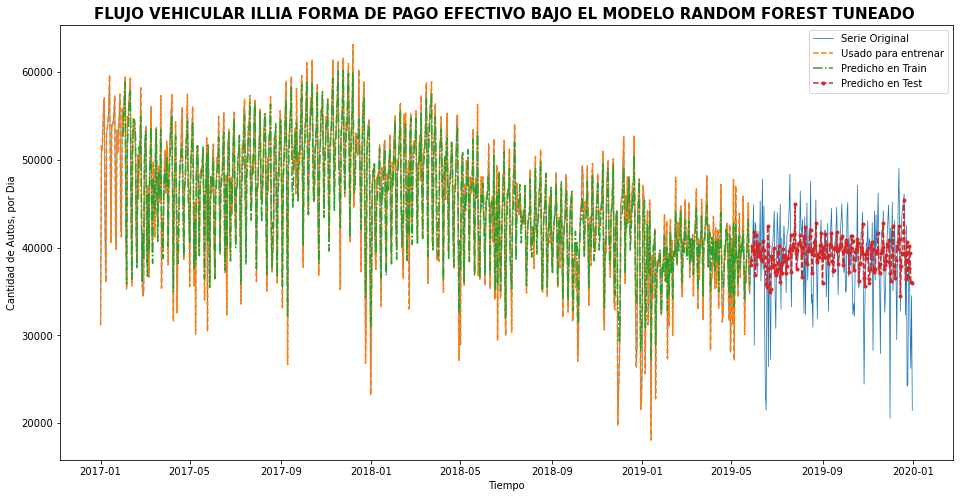

In [71]:
plt.figure(figsize=(16,8))
plt.plot(df.index[:length_total], df[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(df.index[:N_train + look_back], df[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(df.index[look_back:look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(df.index[N_train + look_back:length_total-1], y_test_pred,'--.', label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.title("FLUJO VEHICULAR ILLIA FORMA DE PAGO EFECTIVO BAJO EL MODELO RANDOM FOREST TUNEADO ",size=15, fontweight="bold")
plt.ylabel('Cantidad de Autos, por Dia')
plt.show()

In [72]:

MSE_Train = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE_Train))

MSE_Test = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE_Test))

Error en Train: 2279.350623527212
Error en Test: 4652.883354412805


* Analizamos las metricas obtenidas ahora con este modelo ya tuneado donde podemos observar que el error en los datos de entrenamiento dan mayor comparandolo con el modelo de random forest con los valores predeterminados, sin embargo el error en test disminuye pero no de una manera significativa, lo que logramos concluir es que este modelo no nos ayudara a predecir de una forma confiable los valores a futuro.

RMSE Train: 2279.35
RMSE Test: 4652.88


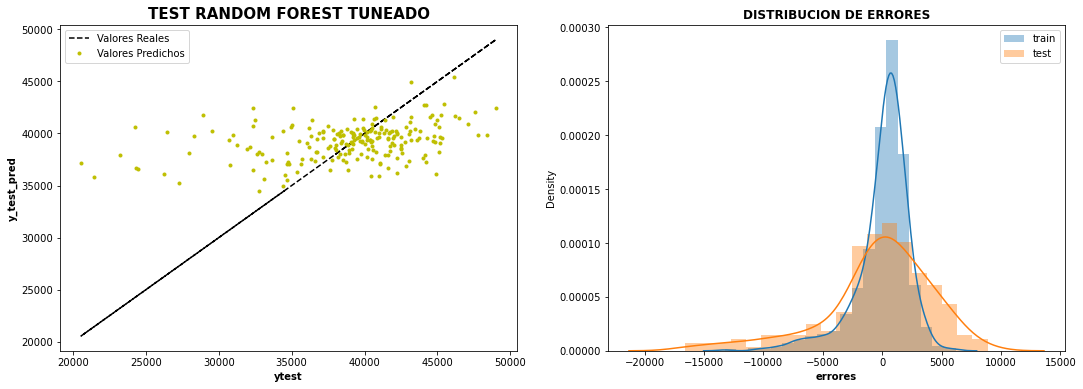

In [73]:
# graficamos el modelo con el fin de obtener informacion sobre el comportamiento del modelo
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)

#realizamos el grafico donde podemos observar la relacion 1 a 1
plt.plot(y_test,y_test,"k--", label="Valores Reales")
plt.plot(y_test, y_test_pred, "y.", label="Valores Predichos")
plt.title("TEST RANDOM FOREST TUNEADO", fontsize=15, fontweight="bold")
plt.xlabel("ytest", fontweight="bold")
plt.ylabel("y_test_pred", fontweight="bold")
plt.legend()


plt.subplot(1,2,2)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores', fontweight="bold")
plt.title("DISTRIBUCION DE ERRORES",fontweight="bold")
plt.legend()

r_squared_train = np.round(r2_score(y_train, y_train_pred),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)
r_squared_test = np.round(r2_score(y_test, y_test_pred),2)
rmse_test=np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)


print( "RMSE Train:",rmse_train)
print("RMSE Test:", rmse_test)

### MODELO XGBOOST

Ahora utilizaremos el modelo XGBoost esto con el fin de poder mejorar las metricas vistas en el modelo anterior, la idea es utilizar los hiperparametros por defecto y tambien tunearlos para verificar si logramos mejorarlo de una manera significativa.

In [74]:
from xgboost import XGBRFRegressor

In [75]:
xgb_model= XGBRFRegressor()

In [76]:
xgb_model.fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=4, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [77]:
y_pred = xgb_model.predict(X)
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

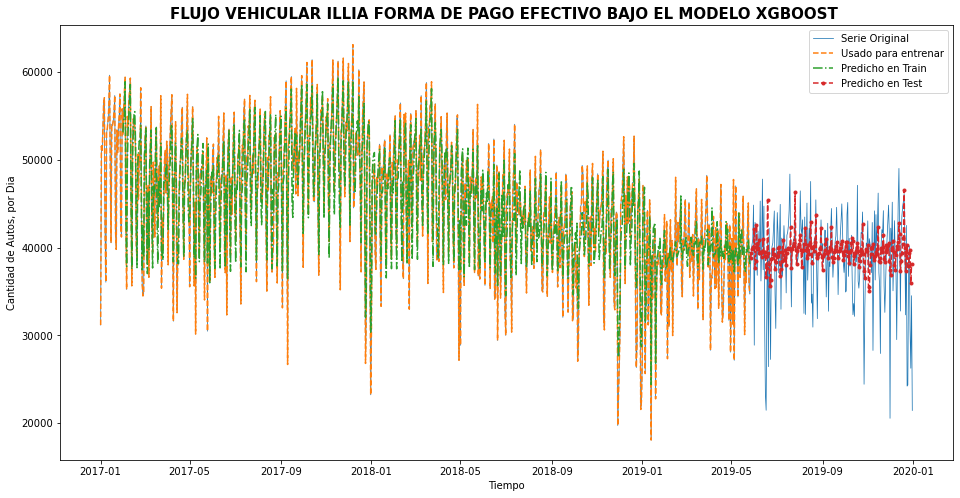

In [78]:
plt.figure(figsize=(16,8))
plt.plot(df.index[:length_total], df[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(df.index[:N_train + look_back], df[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(df.index[look_back:look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(df.index[N_train + look_back:length_total-1], y_test_pred,'--.', label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.title("FLUJO VEHICULAR ILLIA FORMA DE PAGO EFECTIVO BAJO EL MODELO XGBOOST ",size=15, fontweight="bold")
plt.ylabel('Cantidad de Autos, por Dia')
plt.show()

RMSE Train: 3197.04
RMSE: 4702.86


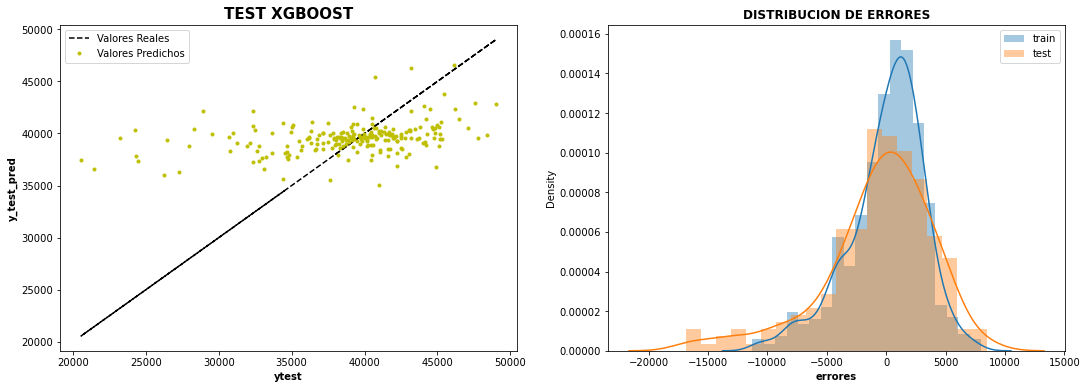

In [79]:
# graficamos el modelo con el fin de obtener informacion sobre el comportamiento del modelo
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)

#realizamos el grafico donde podemos observar la relacion 1 a 1
plt.plot(y_test,y_test,"k--", label="Valores Reales")
plt.plot(y_test, y_test_pred, "y.", label="Valores Predichos")
plt.title("TEST XGBOOST", fontsize=15, fontweight="bold")
plt.xlabel("ytest", fontweight="bold")
plt.ylabel("y_test_pred", fontweight="bold")
plt.legend()


plt.subplot(1,2,2)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores', fontweight="bold")
plt.title("DISTRIBUCION DE ERRORES",fontweight="bold")
plt.legend()

r_squared_train = np.round(r2_score(y_train, y_train_pred),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)
r_squared_test = np.round(r2_score(y_test, y_test_pred),2)
rmse_test=np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)


print( "RMSE Train:",rmse_train)
print("RMSE:", rmse_test)

### TUNEO XGBOOST MODEL

In [80]:
params= {"n_estimators":[100,200,500],
        "gamma":[0,0.1,0.01,0.001],
        "max_depth":[10,30,50,100]}

In [81]:
xgb_gs= GridSearchCV(xgb_model,param_grid=params,n_jobs=-1,verbose=1)

In [82]:
xgb_gs.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.9min finished


GridSearchCV(estimator=XGBRFRegressor(base_score=0.5, booster='gbtree',
                                      colsample_bylevel=1, colsample_bytree=1,
                                      gamma=0, gpu_id=-1,
                                      importance_type='gain',
                                      interaction_constraints='',
                                      max_delta_step=0, max_depth=6,
                                      min_child_weight=1, missing=nan,
                                      monotone_constraints='()',
                                      n_estimators=100, n_jobs=4,
                                      num_parallel_tree=100,
                                      objective='reg:squarederror',
                                      random_state=0, reg_alpha=0,
                                      scale_pos_weight=1, tree_method='exact',
                                      validate_parameters=1, verbosity=None),
             n_jobs=-1,
             pa

In [83]:
xgb_gs.best_params_

{'gamma': 0, 'max_depth': 30, 'n_estimators': 500}

In [84]:
y_pred = xgb_gs.predict(X)
y_train_pred = xgb_gs.predict(X_train)
y_test_pred = xgb_gs.predict(X_test)

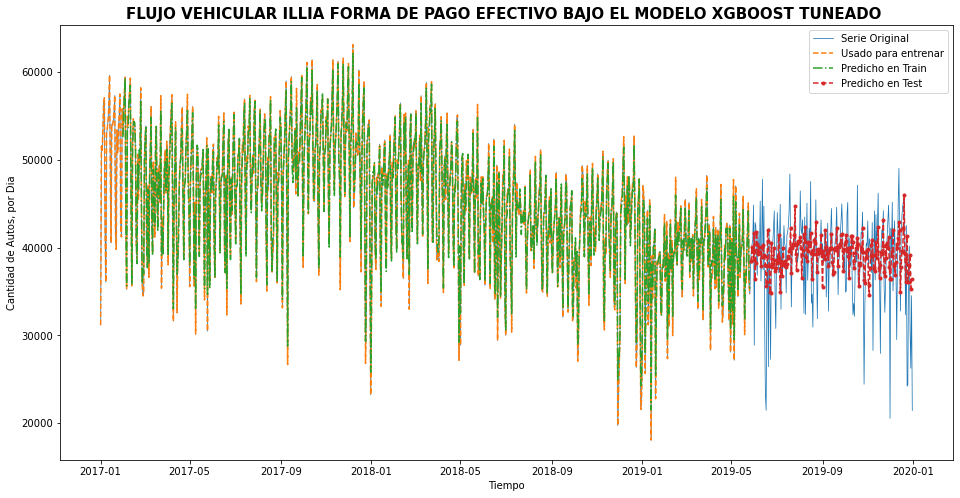

In [85]:
plt.figure(figsize=(16,8))
plt.plot(df.index[:length_total], df[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(df.index[:N_train + look_back], df[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(df.index[look_back:look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(df.index[N_train + look_back:length_total-1], y_test_pred,'--.', label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.title("FLUJO VEHICULAR ILLIA FORMA DE PAGO EFECTIVO BAJO EL MODELO XGBOOST TUNEADO ",size=15, fontweight="bold")
plt.ylabel('Cantidad de Autos, por Dia')
plt.show()

RMSE Train: 1003.62
RMSE Test: 4646.57


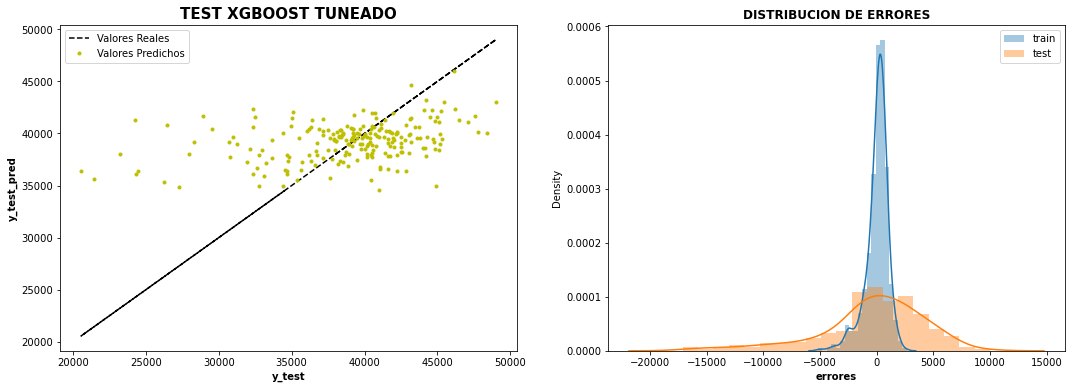

In [86]:
# graficamos el modelo con el fin de obtener informacion sobre el comportamiento del modelo
plt.figure(figsize = (18,6))

plt.subplot(1,2,1)

#realizamos el grafico donde podemos observar la relacion 1 a 1
plt.plot(y_test,y_test,"k--", label="Valores Reales")
plt.plot(y_test, y_test_pred, "y.", label="Valores Predichos")
plt.title("TEST XGBOOST TUNEADO", fontsize=15, fontweight="bold")
plt.xlabel("y_test", fontweight="bold")
plt.ylabel("y_test_pred", fontweight="bold")
plt.legend()


plt.subplot(1,2,2)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores', fontweight="bold")
plt.title("DISTRIBUCION DE ERRORES",fontweight="bold")
plt.legend()

r_squared_train = np.round(r2_score(y_train, y_train_pred),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)
r_squared_test = np.round(r2_score(y_test, y_test_pred),2)
rmse_test=np.round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2)
rmse_train=np.round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)


print( "RMSE Train:",rmse_train)
print("RMSE Test:", rmse_test)

En conclusion a la hora de comparar los dos modelos podemos observar de acuerdo con las metricas obtenidas en ambos, podemos observar que el modelo random forest con parametros tuneados es aquel que nos arroja una mejor prediccion y metricas sin embargo no quiere decir que sea el modelo optimo para poder generar nuestras predicciones para el año 2020.

# MULTI-STEP PREDICTION MODELO XGBOOST TUNEADO

Es hora de utilizar otra tecnica, en este caso utilizaremos la tecnica de multistep prediction la cual nos va permitir verificar si el modelo mejora con respecto a la tecnica anteriomente planteada.

In [87]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = xgb_gs.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

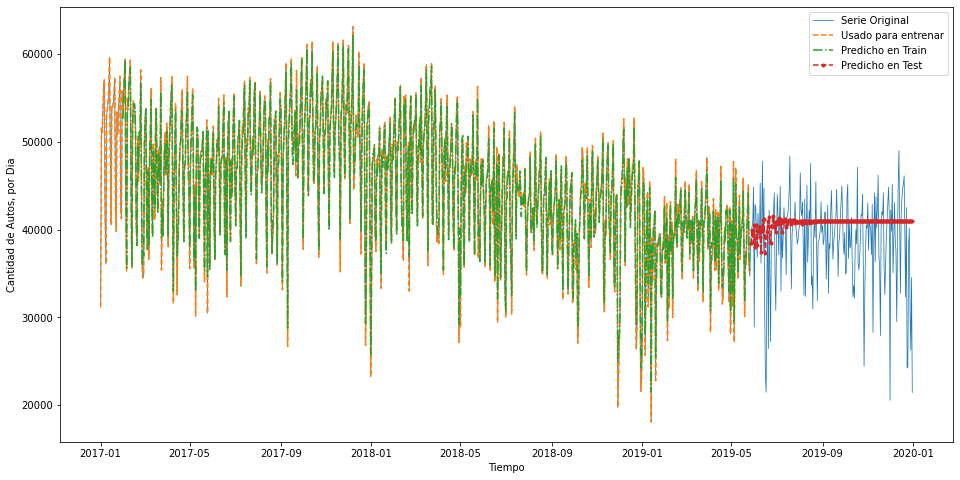

In [88]:
plt.figure(figsize=(16,8))
plt.plot(df.index[:length_total], df[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(df.index[:N_train + look_back], df[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(df.index[look_back:look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(df.index[N_train + look_back:length_total-1], y_ms_test_pred,'--.', label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Autos, por Dia')
plt.show()

In [89]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 5278.650032008355


Con el grafico podemos deducir que la tecnica multistep prediction no esta generalizando ni esta tomando de manera adecuada la variabilidad de los datos, lo que nos indica que este metodo es mucho menos efectivo que el anterior.

### MULTI-STEP PREDICTION MODELO RANDOM FOREST TUNEADO

In [90]:
y_ms_test_pred = []
x = X_test[0,:] # arrancamos con la primera instancias del conjunto de test
for i in range(y_test.size):
    y_os_pred = rfr_gs.predict(x.reshape(1,-1))
    y_ms_test_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_test_pred = np.array(y_ms_test_pred)

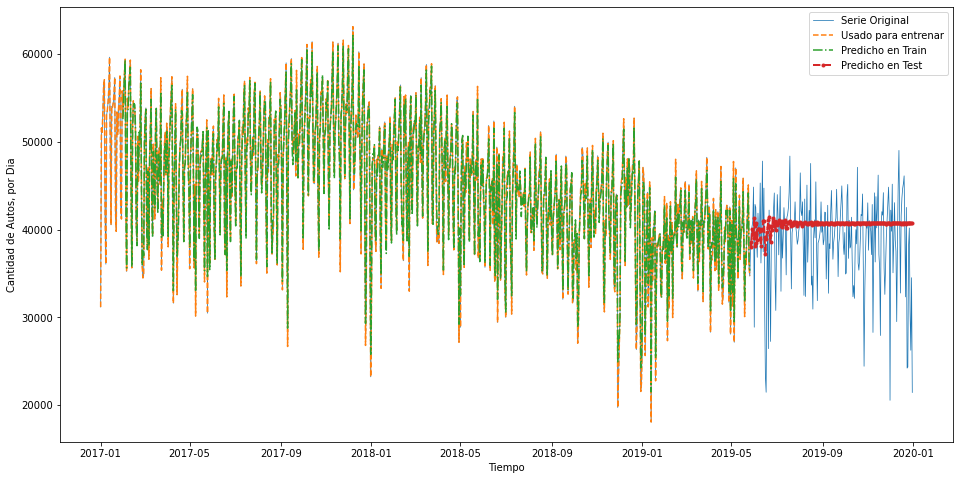

In [91]:
plt.figure(figsize=(16,8))
plt.plot(df.index[:length_total], df[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(df.index[:N_train + look_back], df[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(df.index[look_back:look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(df.index[N_train + look_back:length_total-1], y_ms_test_pred,'--.', lw = 2, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de Autos, por Dia')
plt.show()

In [92]:
MSE = mean_squared_error(y_test, y_ms_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 5212.968289424701


# AÑO 2020

A pesar de que ningun de los dos modelos los consideramos como buenos predictores vamos a utilizar el modelo random forest con los hiperparametros por defecto para verificar su desempeño en el año 2020.

In [93]:
año_2020= pd.read_csv("flujo-vehicular-2020.csv")

In [94]:
año_2020.estacion.unique()

array(['ALBERDI', 'AVELLANEDA', 'DELLEPIANE LINIERSLEPIANE CENTRO',
       'DELLEPIANE LINIERS', 'ILLIA', 'ILP', 'PB1', 'PB3', 'PB4',
       'RETIRO', 'SALGUERO', 'SARMIENTO', 'PB2'], dtype=object)

In [95]:
año_2020.forma_pago.unique()

array(['Efectivo', 'Rec.Deuda', 'Tarjeta Magnética', 'Tag', 'Exento',
       'Violación', 'CPP'], dtype=object)

In [96]:
año_2020.tipo_vehiculo.unique()

array(['Auto', 'Auto con trailer', 'Moto', 'N/D', 'Pago Doble Auto',
       'Pago Doble Auto con trailer / Pesado 2 Ejes', 'Pago doble Moto',
       'Pesados 2 Ejes', 'Pesados 3 Ejes', 'Pesados 4 Ejes',
       'Pesados 5 Ejes', 'Pesados 6 Ejes'], dtype=object)

con la anterior exploracion del dataset del año 2020 logramos evidenciar que se realizaron cambios que no se encontraban en los dataset anteriores. Ahora lo que debemos hacer es estandarizar el modelo de manera de que los datos queden de forma similar para poder compararlos y de esta manera poder utilizar los modelos ya creados para observar su prediccion del año 2020.

In [97]:
año_2020.replace(to_replace="ILLIA",value="Illia",inplace=True)
año_2020.replace(to_replace="Efectivo",value="EFECTIVO",inplace=True)
año_2020.replace(to_replace="Tarjeta Magnética",value="TELEPASE",inplace=True)
año_2020.replace(to_replace="Tag",value="TELEPASE",inplace=True)
año_2020.replace(to_replace="Auto",value="Liviano",inplace=True)
año_2020.replace(to_replace="Auto con trailer",value="Liviano",inplace=True)
año_2020.replace(to_replace="Moto",value="Liviano",inplace=True)
año_2020.replace(to_replace="Pago Doble Auto",value="Liviano",inplace=True)
año_2020.replace(to_replace="Pago doble Moto",value="Liviano",inplace=True)
año_2020.replace(to_replace="Pago Doble Auto con trailer / Pesado 2 Ejes",value="Pesado",inplace=True)
año_2020.replace(to_replace="Pesados 2 Ejes",value="Pesado",inplace=True)
año_2020.replace(to_replace="Pesados 3 Ejes",value="Pesado",inplace=True)
año_2020.replace(to_replace="Pesados 4 Ejes",value="Pesado",inplace=True)
año_2020.replace(to_replace="Pesados 5 Ejes",value="Pesado",inplace=True)
año_2020.replace(to_replace="Pesados 6 Ejes",value="Pesado",inplace=True)

In [98]:
mascara= (año_2020.estacion=="Illia")&(año_2020.forma_pago=="EFECTIVO")

In [99]:
datos2020=año_2020[mascara]

In [100]:
datos2020["fecha2"]= pd.to_datetime(datos2020.fecha)+ pd.to_timedelta(datos2020.hora_fin, unit = 'h')
datos2020.head()

periodo                fecha    mes        dia  dia_fecha  hora_inicio  \
52      2020  2020-01-01 00:00:00  enero  Miércoles          1            0   
53      2020  2020-01-01 00:00:00  enero  Miércoles          1            0   
134     2020  2020-01-01 00:00:00  enero  Miércoles          1            1   
135     2020  2020-01-01 00:00:00  enero  Miércoles          1            1   
202     2020  2020-01-01 00:00:00  enero  Miércoles          1            2   

     hora_fin estacion tipo_vehiculo forma_pago observacion    sentido  \
52          1    Illia       Liviano   EFECTIVO    EFECTIVO     Centro   
53          1    Illia       Liviano   EFECTIVO    EFECTIVO  Provincia   
134         2    Illia       Liviano   EFECTIVO    EFECTIVO     Centro   
135         2    Illia       Liviano   EFECTIVO    EFECTIVO  Provincia   
202         3    Illia       Liviano   EFECTIVO    EFECTIVO     Centro   

     cantidad_pasos              fecha2  
52              326 2020-01-01 01:00:00  
53              319 2020-01-01 01:00:00  
134             199 2020-01-01 02:00:00  
135             180 2020-01-01 02:00:00  
202             114 2020-01-01 03:00:00

In [101]:
datos2020.drop(columns=["periodo","fecha","mes","dia","dia_fecha",
                        "hora_inicio","hora_fin","estacion","observacion","sentido","forma_pago"],inplace=True)

In [102]:
datos2020.rename(columns = {'fecha2':'fecha'}, inplace = True) 
datos2020.head()

tipo_vehiculo  cantidad_pasos               fecha
52        Liviano             326 2020-01-01 01:00:00
53        Liviano             319 2020-01-01 01:00:00
134       Liviano             199 2020-01-01 02:00:00
135       Liviano             180 2020-01-01 02:00:00
202       Liviano             114 2020-01-01 03:00:00

In [103]:
datacomplete= pd.concat([dataset1,datos2020])

In [104]:
datacomplete["fecha"]= pd.to_datetime(datacomplete.fecha)

In [105]:
diario_completo=datacomplete.resample("D",on="fecha").sum()

In [106]:
#Analizamos el año 2019 y 2020
px.line(diario_completo[720:],title="FLUJO VEHICULAR 2019-2020 ESTACION ILLIA PAGO EN EFECTIVO",
       labels={"value":"Cantidad de Vehiculos por Dia","variable":"Datos Reales"})

Analizando el grafico anterior podemos observar una caida en el flujo vehicular de forma abrupta a partir del mes de marzo, esto se debe a la cuarentena obligatoria impuesta por algunos gobiernos debido a la pandemia que atravesamos actualmente, lo que me lleva a no realizar la prediccion con los modelos que realizamos anteriormente para los años 2017-2019, ya que este cambio no lo va a predecir ningun modelo debido a que es una situacion atipica que vive el mundo y los datos no podrian predecir este comportamiento de manera optima.


##  INVESTIGACION - REDES NEURONALES RECURRENTES EN LA SERIE DE TIEMPO

In [107]:
diario=diario.drop(columns=["PMS","SPME","SETadd"])

In [113]:
# Importamos las librerias a Utilizar 

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM

In [114]:
# TRAIN Y TEST SPLIT 
len(diario)
size= int(len(diario)-360) # Utilizo el ultimo año para constituir el set de test 
train,test= diario.iloc[:size],diario.iloc[size:]

In [115]:
len(diario)

1095

In [116]:
# ESCALANDO LOS DATOS
# Por lo general siempre que vamos a trabajar con redes neuronales debemos Normalizar los Datos
# Utilizamos la funcion de sklearn StandarScaler
from sklearn.preprocessing import StandardScaler

scl=StandardScaler()

scl.fit(train)

scale_train= scl.transform(train)
scale_test= scl.transform(test)


In [117]:
# Las Redes Neuronales Recurrentes requieren de Preprocesamiento
# la funcion TIMES SERIES GENERATOR nos va permitir tomar una secuencia de datos espaciados en intervalos iguales, 
# producir batches para el entrenamiento y el testeo

n_input=30 # utilizo 30 dias para crear el numero de batches ya que la serie temporal tiene un ciclo semanal
n_features=1 # utilizo 1 que sera el valor de la prediccion
generator= TimeseriesGenerator(scale_train,scale_train,length=n_input,batch_size=n_features)

# asi luce el primer batch?
X,y=generator[0]

print(f"Datos: \n{X.flatten()}")
print(f"Prediccion:\n {y}")

Datos: 
[-2.07724159  0.70053896  0.63581265  0.94091202  1.37069469  1.45177291
 -0.65953108 -1.41199142  0.90057731  0.97756755  1.10320472  1.31019263
  1.80197629  0.35251583 -0.80138389  1.04024987  1.02376169  1.09571009
  1.24287727  1.48665698 -0.5954861  -0.90249319  0.95140449  0.60338136
  0.98519844  1.18251147  1.50968592 -0.49001629 -0.7098132   1.279124  ]
Prediccion:
 [[0.87414172]]


In [145]:
# CREAMOS EL MODELO 

model= Sequential() # Definimos la Red Neuronal
model.add(LSTM(100,activation="relu",input_shape=(n_input,n_features)))
# añadimos una capa de tipo LSTM y añadimos la cantidad de neuronas para este caso trabajamos con 100 y la funcion de activacion "relu"
# input_shape= es la dimension del TimeGenerator
model.add(Dense(1)) # añadimos una capa de densidad
model.compile(optimizer="adam",loss="mse") # y compilamos con la funcion de perdida del error cuadratico medio

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Al analizar el resumen anterior podemos observar la complejidad del modelo, podemos observar como se incrementan de una manera exponencial los parametros analizados en la red neuronal.

In [146]:
model.fit_generator(generator,epochs=50) # las epochs son una carrera completa en los datos de entrenamiento

Epoch 1/50
705/705 [==============================] - 5s 7ms/step - loss: 1.0266
Epoch 2/50
705/705 [==============================] - 5s 7ms/step - loss: 0.8135
Epoch 3/50
705/705 [==============================] - 5s 6ms/step - loss: 0.7928
Epoch 4/50
705/705 [==============================] - 4s 6ms/step - loss: 0.8028
Epoch 5/50
705/705 [==============================] - 4s 6ms/step - loss: 0.7763
Epoch 6/50
705/705 [==============================] - 4s 6ms/step - loss: 0.7392
Epoch 7/50
705/705 [==============================] - 4s 6ms/step - loss: 0.6852
Epoch 8/50
705/705 [==============================] - 4s 6ms/step - loss: 0.5803
Epoch 9/50
705/705 [==============================] - 4s 6ms/step - loss: 0.5626
Epoch 10/50
705/705 [==============================] - 4s 6ms/step - loss: 0.5304
Epoch 11/50
705/705 [==============================] - 4s 6ms/step - loss: 0.5069
Epoch 12/50
705/705 [==============================] - 4s 6ms/step - loss: 0.5143
Epoch 13/50
705/705 [====

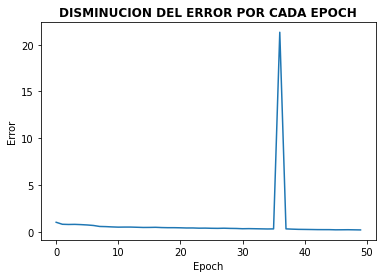

In [147]:
loss_per_epoch= model.history.history["loss"]
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
plt.title("DISMINUCION DEL ERROR POR CADA EPOCH",size=12, fontweight="bold")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

In [148]:
test_prediction=[]
first_eval_batch= scale_train[-n_input:]
current_batch= first_eval_batch.reshape((1,n_input,n_features))


for i in range(len(test)):
    
    #obtener la prediccion ([0]es para obtener solo el numero en lugar de matriz)
    current_pred= model.predict(current_batch)[0]
    
    test_prediction.append(current_pred)
    
    # actualizar el lote para incluir ahora la prediccion y soltar primer valor
    current_batch= np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [149]:
true_predictions= scl.inverse_transform(test_prediction)

In [150]:
test["predictions"]=true_predictions

In [151]:
test.head()

cantidad_pasos   predictions
fecha                                   
2019-01-06         35546.0  25660.031250
2019-01-07         39580.0  39766.617188
2019-01-08         44266.0  42454.070312
2019-01-09         31199.0  46083.218750
2019-01-10         34330.0  47999.355469

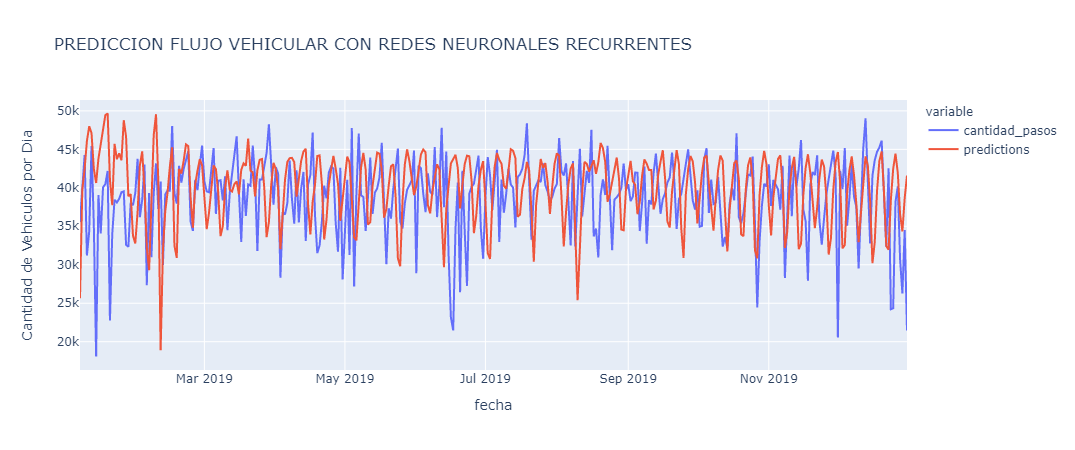

In [152]:
px.line(test,title="PREDICCION FLUJO VEHICULAR CON REDES NEURONALES RECURRENTES",
        labels={"value":"Cantidad de Vehiculos por Dia"})

In [153]:
print(f"RMSE Red Neuronal :{round(np.sqrt(mean_squared_error(test.cantidad_pasos,test.predictions)),2)}")


RMSE Red Neuronal :6738.4
